## A tiny distilled VAE model for compression and decompression

In [1]:
import torch
from diffusers import AutoencoderTiny
from torchvision.transforms.functional import to_pil_image, center_crop, resize, to_tensor
from PIL import Image

In [2]:
original_img = Image.open("../asset/angel.png").convert("RGB")

In [3]:
DIM = 512
image = center_crop(resize(original_img, DIM), DIM)

Before compression

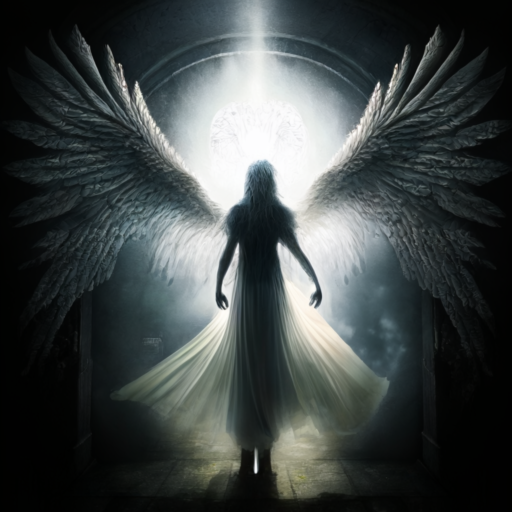

In [4]:
image

In [5]:
device = "mps"
model_id = "madebyollin/taesd"
vae = AutoencoderTiny.from_pretrained(model_id).to(device)

In [6]:
image_raw = to_tensor(image).unsqueeze(0).to(device)
image_enc = vae.encoder(image_raw)
image_dec = vae.decoder(image_enc).clamp(0, 1)

In [7]:
image_raw.shape, image_enc.shape, image_dec.shape

(torch.Size([1, 3, 512, 512]),
 torch.Size([1, 4, 64, 64]),
 torch.Size([1, 3, 512, 512]))

In [8]:
def summarize_tensor(x):
    return f"\033[34m{str(tuple(x.shape)).ljust(24)}\033[0m (\033[31mmin {x.min().item():+.4f}\033[0m / \033[32mmean {x.mean().item():+.4f}\033[0m / \033[33mmax {x.max().item():+.4f}\033[0m)"

In [9]:
print("latents", summarize_tensor(image_raw[0]))

latents (3, 512, 512)            (min +0.0000 / mean +0.2645 / max +0.9961)


In [10]:
def latent_to_visualization(latent):
    latent = vae.scale_latents(latent)
    return torch.cat([latent[:3], latent[3:].expand(3, *latent.shape[-2:])], -2)

Compressed

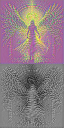

In [11]:
undimensionalized = latent_to_visualization(image_enc[0])
latents = to_pil_image(undimensionalized)
latents

In [12]:
undimensionalized.shape

torch.Size([3, 128, 64])

Reconstruction from compression

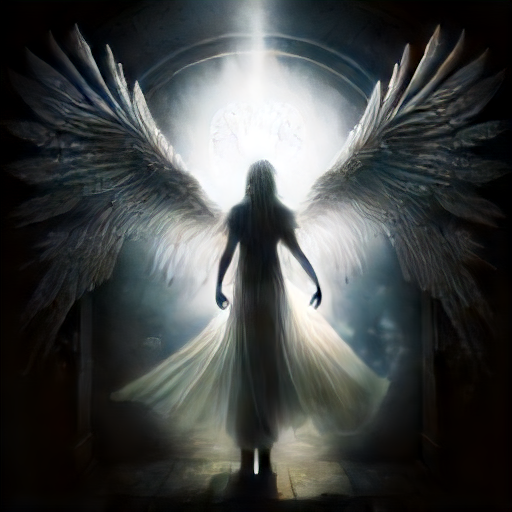

In [13]:
to_pil_image(image_dec[0])